<a href="https://colab.research.google.com/github/polo-music/MONEY-FLOW-INDEX/blob/main/Money_Flow_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

#cargamos database
url = 'https://raw.githubusercontent.com/polo-music/MONEY-FLOW-INDEX/main/TUB.MC.csv'

df = pd.read_csv(url)
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df = df.tail(700)
df

,Date,Open,High,Low,Close,Adj Close,Volume
2018-05-11,2018-05-11,3.410,3.425,3.320,3.370,3.313891,606655.0
2018-05-14,2018-05-14,3.360,3.380,3.315,3.350,3.294224,327256.0
2018-05-15,2018-05-15,3.355,3.355,3.280,3.280,3.225390,269627.0
2018-05-16,2018-05-16,3.285,3.325,3.140,3.285,3.230307,1554078.0
2018-05-17,2018-05-17,3.300,3.380,3.270,3.350,3.294224,290699.0
...,...,...,...,...,...,...,...
2021-01-27,2021-01-27,1.350,1.364,1.320,1.338,1.338000,523612.0
2021-01-28,2021-01-28,1.334,1.398,1.282,1.394,1.394000,437691.0
2021-01-29,2021-01-29,1.402,1.402,1.322,1.322,1.322000,179533.0
2021-02-01,2021-02-01,1.348,1.540,1.302,1.430,1.430000,1390484.0


In [96]:
#Calcular precio tipico y periodo
p_tipico = ((df['Close'] + df['High'] + df['Low']) / 3)
periodo = 14

#Calculamos el money flow
mf = p_tipico * df['Volume']

#Separar entre money flow positivo y money flow negativo y check cada variable
positivo = []
negativo = []

for i in range(1, len(p_tipico)):
  if p_tipico[i] > p_tipico[i-1]:
    positivo.append(mf[i-1])
    negativo.append(0)
  elif p_tipico[i] < p_tipico[i-1]:
    positivo.append(0)
    negativo.append(mf[i-1])
  else:
    positivo.append(0)
    negativo.append(0)

#Repetimos loop para encontrar
mf_positivo = []
mf_negativo = []

for i in range(0, len(positivo)):
  mf_positivo.append(sum(positivo[i+1-periodo : i+1])) 

for i in range(0, len(negativo)):
  mf_negativo.append(sum(negativo[i+1 - periodo : i+1]))

#Calculo del money flow index
mfi = 100 * (np.array(mf_positivo) / (np.array(mf_positivo) + np.array(mf_negativo)))

df_mf = pd.DataFrame()
df_mf['Money Flow Index'] = mfi

#marcamos los que cruzan 10% 20% 80% 90%
deu = []
vint = []
vuit = []
nou = []
superior = False
inferior = False
for i in range(0, len(mfi)):
  if np.round(df_mf['Money Flow Index'][i]) < 10 and inferior == False:
    deu.append(10)
    vint.append(np.nan)
    vuit.append(np.nan)
    nou.append(np.nan)
    inferior = True
  elif np.round(df_mf['Money Flow Index'][i]) < 10 and inferior == True:
    deu.append(10)
    vint.append(np.nan)
    vuit.append(np.nan)
    nou.append(np.nan)
    inferior = False
  elif np.round(df_mf['Money Flow Index'][i]) < 20:
    deu.append(np.nan)
    vint.append(20)
    vuit.append(np.nan)
    nou.append(np.nan)
  elif np.round(df_mf['Money Flow Index'][i]) > 90:
    deu.append(np.nan)
    vint.append(np.nan)
    vuit.append(np.nan)
    nou.append(90)
  elif np.round(df_mf['Money Flow Index'][i]) > 80:
    deu.append(np.nan)
    vint.append(np.nan)
    vuit.append(80)
    nou.append(np.nan)
  else:
    deu.append(np.nan)
    vint.append(np.nan)
    vuit.append(np.nan)
    nou.append(np.nan)

df_mf['10%'] = deu
df_mf['20%'] = vint
df_mf['80%'] = vuit
df_mf['90%'] = nou

df_mf2 = df_mf.tail(700)

#calculamos ema largo 150 dias y lo añadimos al dataframe
longEMA = df['Close'].ewm(span = 150, adjust = False).mean()
shortEMA = df['Close'].ewm(span = 7, adjust = False).mean()
df['Long EMA'] = longEMA
df['Short EMA'] = shortEMA

df_mf2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


,Money Flow Index,10%,20%,80%,90%
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
694,46.101864,NaN,NaN,NaN,NaN
695,49.051480,NaN,NaN,NaN,NaN
696,43.510619,NaN,NaN,NaN,NaN
697,35.637759,NaN,NaN,NaN,NaN


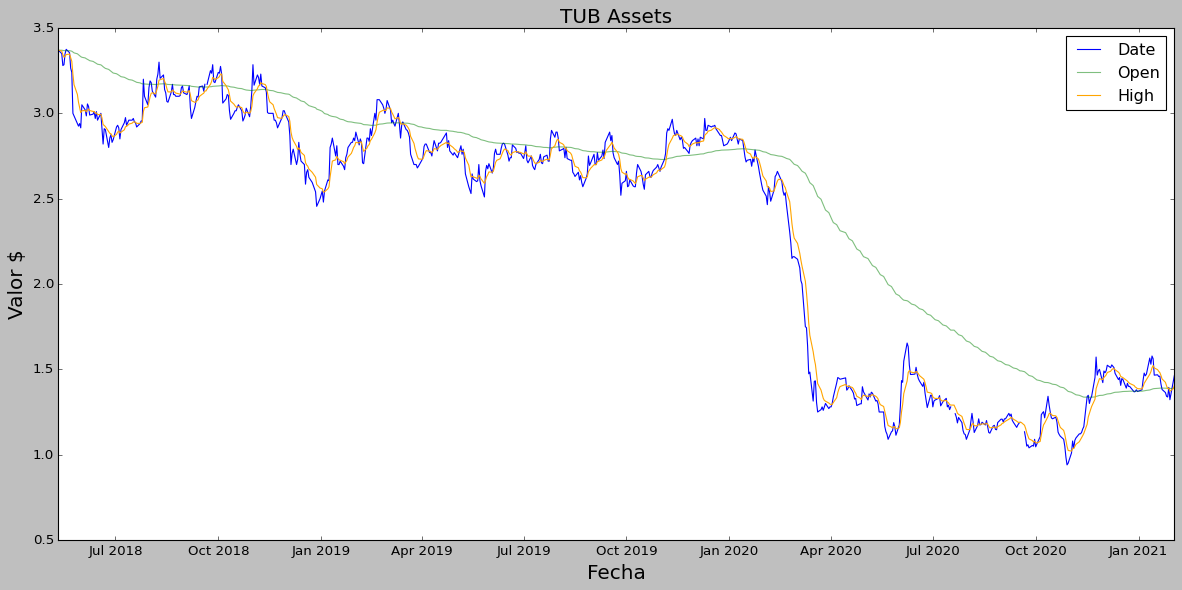

In [85]:
plt.figure(figsize=(18, 8))
plt.plot(df['Close'], label = 'Precio final', color = 'blue')
plt.plot(df['Long EMA'], label = 'EMA', color = 'green', alpha = 0.5)
plt.plot(df['Short EMA'], label = 'EMA SHORT', color = 'orange', alpha = 1)
plt.title('TUB Assets', fontsize = 18)
plt.xlabel('Fecha', fontsize = 18)
plt.ylabel('Valor $', fontsize = 18)

plt.legend(df.columns.values, loc = 'upper right')

plt.show()

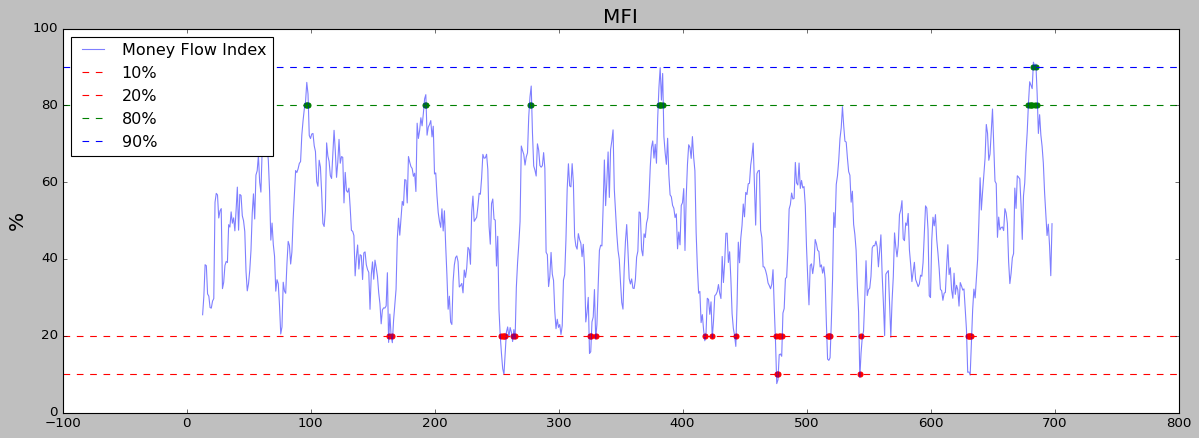

In [97]:
plt.figure(figsize=(18, 6))
plt.plot(df_mf2['Money Flow Index'], label = 'MFI', color = 'blue', alpha = 0.5)
plt.title('MFI', fontsize = 18)
plt.ylabel('%', fontsize = 18)
plt.axhline(10, linestyle = '--', color = 'red')
plt.axhline(20, linestyle = '--', color = 'red')
plt.axhline(80, linestyle = '--', color = 'green')
plt.axhline(90, linestyle = '--', color = 'blue')

plt.scatter(df_mf2.index, df_mf2['10%'], label = '10%', marker='o', color = 'red')
plt.scatter(df_mf2.index, df_mf2['20%'], label = '20%', marker='o', color = 'red')
plt.scatter(df_mf2.index, df_mf2['80%'], label = '80%', marker='o', color = 'green')
plt.scatter(df_mf2.index, df_mf2['90%'], label = '90%', marker='o', color = 'green')

plt.legend(df_mf2.columns.values, loc = 'upper left')

plt.show()